In [2]:
#https://github.com/karvenka/kaggle-airbnb/blob/master/notebooks/Venkatesan_Karthick_Final_Project_Report.ipynb 主要參考來源

In [3]:
# Load the data into DataFrames
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import seaborn.apionly as sns

train_users = pd.read_csv("C:/Users/user/Desktop/train_users_2.csv")
test_users = pd.read_csv("C:/Users/user/Desktop/test_users.csv")
age_gender = pd.read_csv("C:/Users/user/Desktop/age_gender_bkts.csv")
sessions=pd.read_csv("C:/Users/user/Desktop/sessions.csv")
countries=pd.read_csv("C:/Users/user/Desktop/countries.csv")

ModuleNotFoundError: No module named 'seaborn.apionly'

In [49]:
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [50]:
users.set_index('id',inplace=True)

In [51]:
users.gender.replace('-unknown-', np.nan, inplace=True)
users.first_browser.replace('-unknown-', np.nan, inplace=True)

In [52]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
first_browser              16.111226
gender                     46.990169
dtype: float64

In [53]:
users.loc[users.age > 85, 'age'] = np.nan
users.loc[users.age < 18, 'age'] = np.nan

In [54]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [55]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [56]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'], errors='ignore')
users['date_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'], errors='ignore')

In [57]:
df = users[~users['country_destination'].isnull()]

In [58]:
users.loc[users.age > 85, 'age'] = np.nan
users.loc[users.age < 18, 'age'] = np.nan
users['age'].fillna(-1,inplace=True)
bins = [-1, 0, 4, 9, 14, 19, 24, 29, 34,39,44,49,54,59,64,69,74,79,84,89]
users['age_group'] = np.digitize(users['age'], bins, right=True)

In [59]:
df = users[users['country_destination'].isnull()]

In [60]:
date_account_created = pd.DatetimeIndex(users['date_account_created'])
date_first_active = pd.DatetimeIndex(users['date_first_active'])
date_first_booking = pd.DatetimeIndex(users['date_first_booking'])

In [61]:
#users['day_account_created'] = date_account_created.day
users['weekday_account_created'] = date_account_created.weekday
#users['week_account_created'] = date_account_created.week
users['month_account_created'] = date_account_created.month
#users['year_account_created'] = date_account_created.year
#users['day_first_active'] = date_first_active.day
users['weekday_first_active'] = date_first_active.weekday
#users['week_first_active'] = date_first_active.week
users['month_first_active'] = date_first_active.month
users['month_first_book'] = date_first_booking.month
users['hour_first_active'] = date_first_active.hour
#users['year_first_active'] = date_first_active.year

In [62]:
users['time_lag_create'] = (date_first_booking - date_account_created).days
users['time_lag_active'] = (date_first_booking - date_first_active).days
users['time_lag_create'].fillna(365,inplace=True)
users['time_lag_active'].fillna(365,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


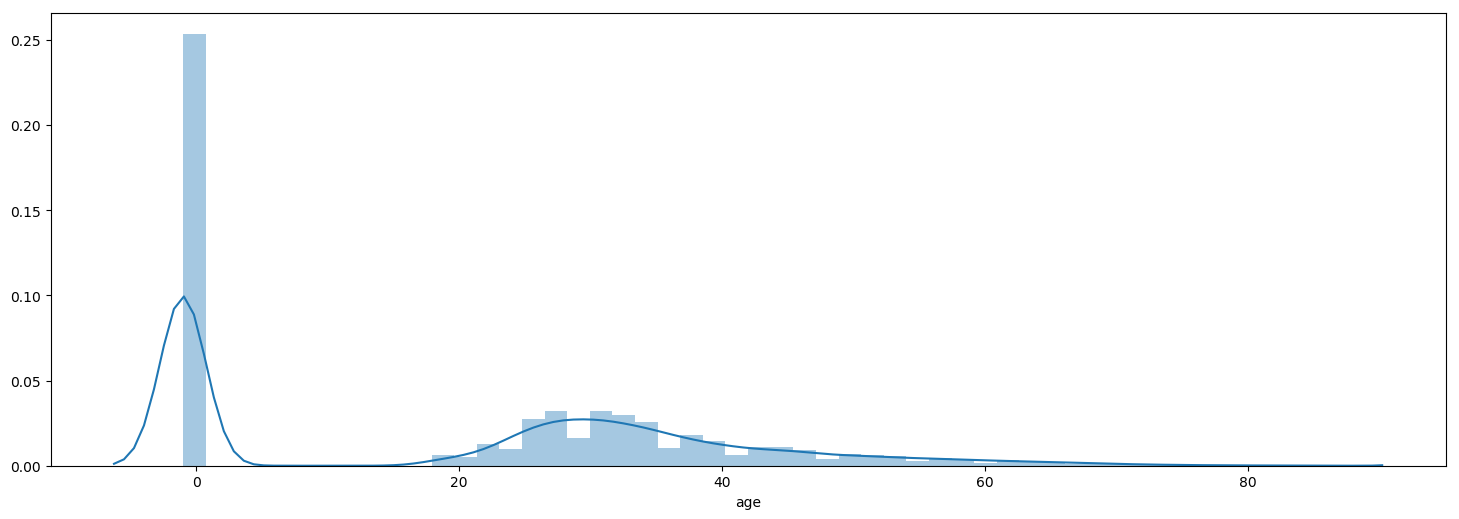

In [63]:
plt.figure(figsize=(18,6))
sns.distplot(users.age.dropna())

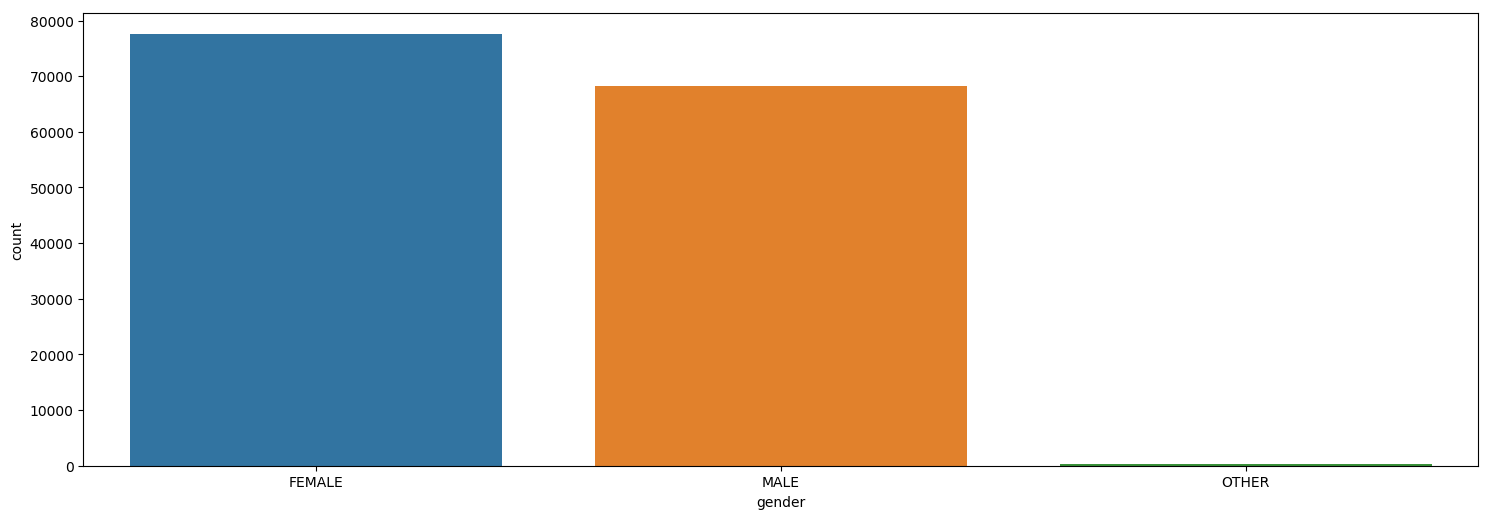

In [64]:
plt.figure(figsize=(18,6))
sns.countplot(x='gender', data=users)

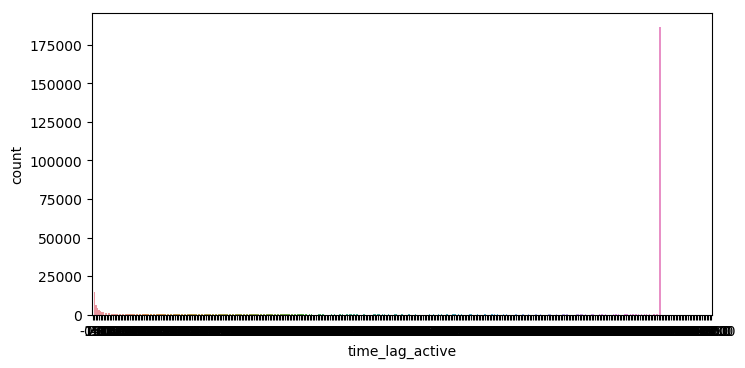

In [65]:
plt.figure(figsize=(8,4))
sns.countplot(users['time_lag_active'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

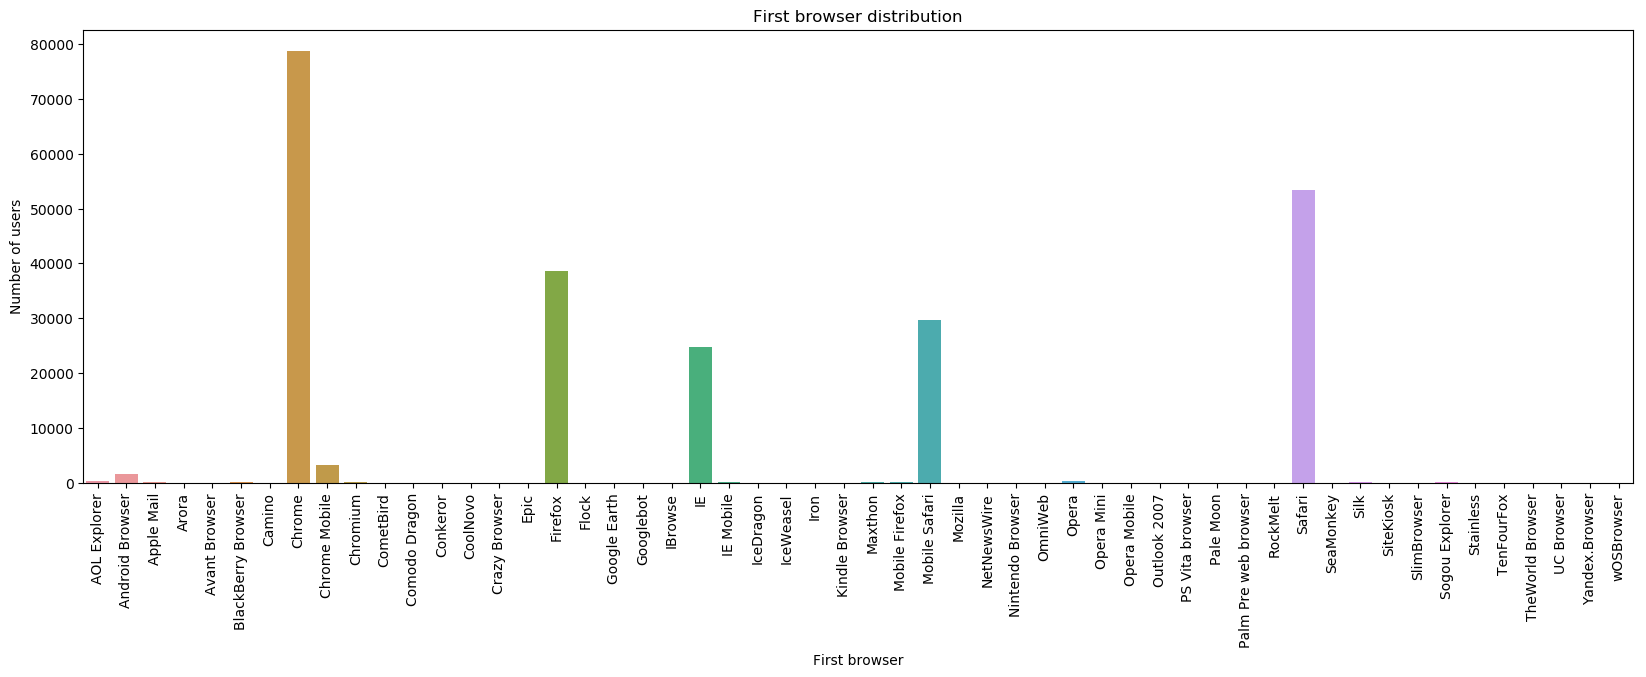

In [66]:
# Most of them use:Chrome browser to access Airbnb website.
# Next favourite seems to be Safari browser (Fig.13).
plt.figure(figsize=(20,6))
sns.countplot(x='first_browser', data=users)
plt.xlabel('First browser')
plt.ylabel('Number of users')
plt.title('First browser distribution')
plt.xticks(rotation=90)

In [67]:
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\__init__.py:1426: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'Qt5Agg' by the following code:
  File "C:\Users\user\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\user\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\user\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\p

<module 'seaborn.apionly' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\seaborn\\apionly.py'>

In [68]:
users.loc[users.time_lag_create > 365, 'time_lag_create'] = 365
users.loc[users.time_lag_active > 365, 'time_lag_create'] = 365

In [69]:
drop_list = [
    'date_account_created',
    'date_first_active',
    'date_first_booking',
    'timestamp_first_active',
    'age'
]

users.drop(drop_list, axis=1, inplace=True)

In [70]:
display(sessions.isnull().sum())

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

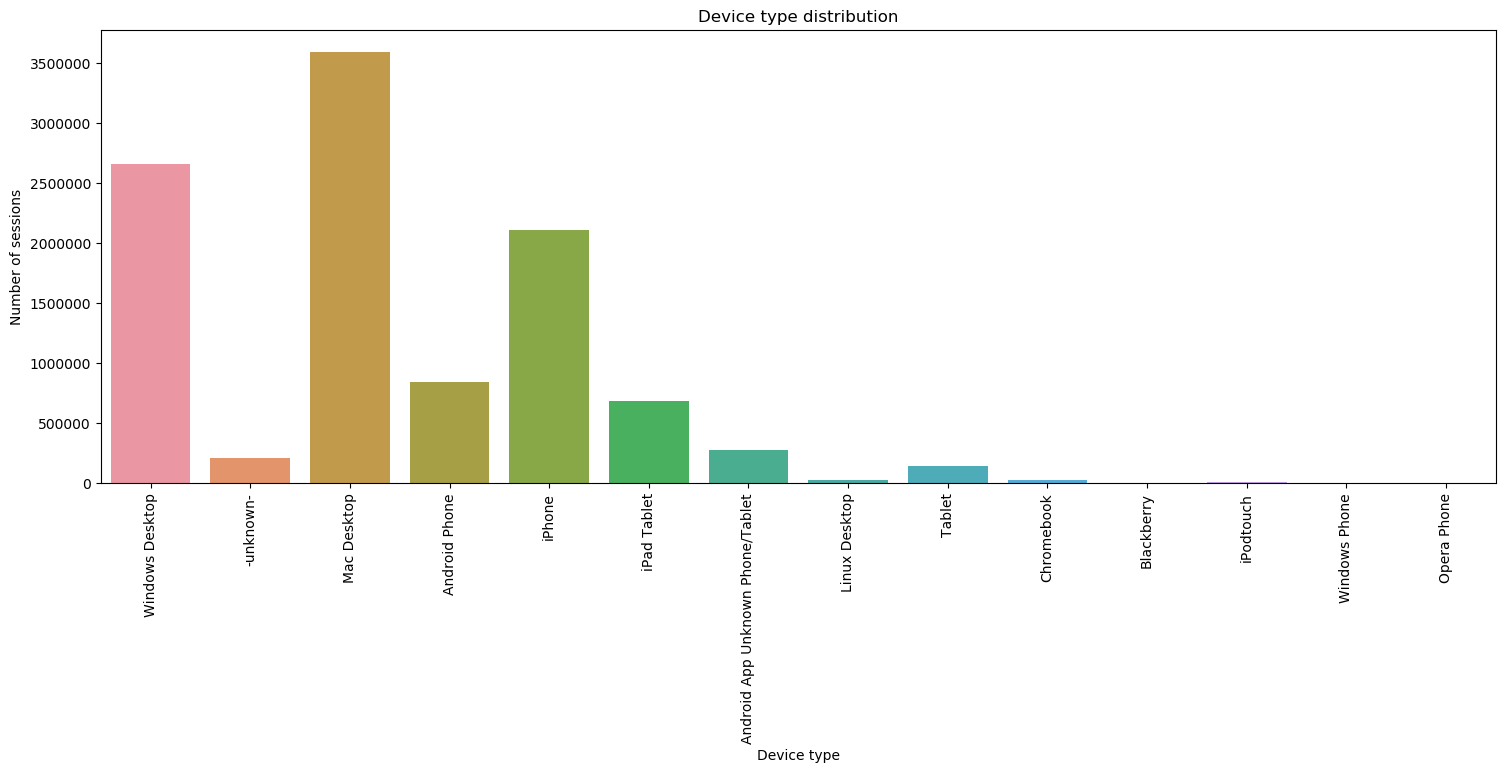

In [71]:
#the most popular device to access Airbnb seems to be Mac Desktop
plt.figure(figsize=(18,6))
sns.countplot(x='device_type', data=sessions)
plt.xlabel('Device type')
plt.ylabel('Number of sessions')
plt.title('Device type distribution')
plt.xticks(rotation=90)

In [72]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


In [73]:
sessions.rename(columns = {'user_id': 'id'}, inplace=True)

In [74]:
from sklearn import preprocessing
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

action_count = sessions.groupby(['id'])['action'].nunique()

#action_count = pd.DataFrame(min_max_scaler.fit_transform(action_count.fillna(0)),columns=action_count.columns)
action_type_count = sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_type_count.columns = action_type_count.columns.map(lambda x: str(x) + '_count')
#action_type_count = pd.DataFrame(min_max_scaler.fit_transform(action_type_count.fillna(0)),columns=action_type_count.columns)
action_type_sum = sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(sum)

action_type_pcts = action_type_sum.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack()
action_type_pcts.columns = action_type_pcts.columns.map(lambda x: str(x) + '_pct')
action_type_sum = action_type_sum.unstack()
action_type_sum.columns = action_type_sum.columns.map(lambda x: str(x) + '_sum')
action_detail_count = sessions.groupby(['id'])['action_detail'].nunique()

#action_detail_count = pd.DataFrame(min_max_scaler.fit_transform(action_detail_count.fillna(0)),columns=action_detail_count.columns)

device_type_sum = sessions.groupby(['id'])['device_type'].nunique()

#device_type_sum = pd.DataFrame(min_max_scaler.fit_transform(device_type_sum.fillna(0)),columns=device_type_sum.columns)

sessions_data = pd.concat([action_count, action_type_count, action_type_sum,action_type_pcts,action_detail_count, device_type_sum],axis=1)
action_count = None
action_type_count = None
action_detail_count = None
device_type_sum = None


#users = users.join(sessions_data, on='id')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [75]:
users= users.reset_index().join(sessions_data, on='id')

In [76]:
from sklearn.preprocessing import LabelEncoder
categorical_features = [
    'gender', 'signup_method', 'signup_flow', 'language',
    'affiliate_channel', 'age_group','weekday_account_created','month_account_created','weekday_first_active','month_first_active','hour_first_active',
    'signup_app','affiliate_provider', 'first_affiliate_tracked','first_device_type', 'first_browser'
]
users_sc = users.copy(deep=True)
encode = LabelEncoder()
for j in categorical_features:
    users_sc[j] = encode.fit_transform(users[j].astype('str'))

In [77]:
colx = users_sc.columns.tolist()
rm_list = ['id','country_destination']
for x in rm_list:
    colx.remove(x)
X = users_sc[~(users_sc['country_destination'].isnull())][colx]
X.fillna(0,inplace=True)
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.8))
sel.fit_transform(X)
idxs = sel.get_support(indices=True)
colo = [X.columns.tolist()[i] for i in idxs]
print ('\n'.join(colo))
for y in rm_list:
    colo.append(y)

affiliate_channel
affiliate_provider
first_affiliate_tracked
first_browser
first_device_type
gender
language
signup_flow
age_group
weekday_account_created
month_account_created
weekday_first_active
month_first_active
month_first_book
hour_first_active
time_lag_create
time_lag_active
action
-unknown-_count
click_count
data_count
message_post_count
submit_count
view_count
-unknown-_sum
booking_request_sum
booking_response_sum
click_sum
data_sum
message_post_sum
partner_callback_sum
submit_sum
view_sum
-unknown-_pct
booking_request_pct
click_pct
data_pct
message_post_pct
submit_pct
view_pct
action_detail


In [78]:
categorical_features_1 = [val for val in categorical_features if val in colo]
users_encode = pd.get_dummies(users[colo], columns=categorical_features_1)

In [79]:
from time import time
from math import sqrt
import logging
import os
import sys
import csv
import datetime


total = {}
started = {}
model_perf={}

        
def start(key):
    started[key]=time()


def stop(key):
    stop=time()
    start=started.pop(key,None)
    if start:
        if key in total:
            total[key].append(stop-float(start))
        else:
            total[key]=[stop-float(start)]
    else:
        logging.error("stopping non started timer: %s"%key)

In [80]:
from sklearn.model_selection import train_test_split
users = users_encode
users.set_index('id',inplace=True)
users.drop([col for col in users.columns if 'pct_booking_request' in col],axis=1,inplace=True)
users.drop([col for col in users.columns if 'booking_request_count' in col],axis=1,inplace=True)
colx = users.columns.tolist()
#colx_1 = users_data_1.columns.tolist()
rm_list = ['country_destination','month_first_book', 'time_lag_create','time_lag_active']
for x in rm_list:
    colx.remove(x)
X_1 = users[(users['country_destination'].isnull())][colx]
X_1.fillna(0,inplace=True)
X = users[~(users['country_destination'].isnull())][colx]
#X_1 = users_data_1[~(users_data_1['country_destination'].isnull())][colx_1]
Y = users[~(users['country_destination'].isnull())]['country_destination']
#Y_1 = users_data_1[~(users_data_1['country_destination'].isnull())]['country_destination']
X.fillna(0,inplace=True)
#X_1.fillna(0,inplace=True)
#X_res,Y_res = ada.fit_sample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)
#X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=42,stratify=Y)

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
feature_imp = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), dt.feature_importances_), X.columns.tolist()), 
             reverse=True))
feature_imp.columns = ['value','feature']
feature_imp.set_index('feature',inplace=True)

In [1]:
y_pred_prob_1=dt.predict_proba(X_1)
id_test = X_1.reset_index()['id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    arr = [dt.classes_.tolist()[k] for k in np.argsort(y_pred_prob_1[i])[::-1]] 
    cts += arr[:5]

#Generate submission
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('sub_dt.csv',index=False)

NameError: name 'dt' is not defined